<a href="https://colab.research.google.com/github/qdrptd/RNE/blob/main/WordCloud%26SemanticNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [ ]:
df = pd.read_excel('comments 3-1.xlsx')

In [7]:
print(df.columns)
comments = df["내용"].values.tolist()
likes = df['좋아요'].values.tolist()

Index(['Unnamed: 0', '타입', '검색어', '영상', '작성자', '내용', '좋아요'], dtype='object')


In [8]:
for i in range(len(likes)):
  likes[i] = str(likes[i])
  try:
    likes[i] = likes[i].replace('\n', '')
    likes[i] = likes[i].replace(' ', '')
  except:
    pass
  if 'K' in likes[i]:
    likes[i] = float(likes[i][:-1]) * 1000
  likes[i] = int(likes[i])

In [9]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [10]:
tokenized_content = []
for i in range(len(comments)):
  if not comments[i] or likes[i] < 10:
    continue
  try:
    tokenized = word_tokenize(comments[i])
  except:
    pass
  for word in tokenized:
    tokenized_content.append(word)

In [11]:
lemmatized_content = []
lm = WordNetLemmatizer()
for word in tokenized_content:
  lemmatized_content.append(lm.lemmatize(word.lower()))

In [12]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
sw = stopwords.words('english')

In [14]:
filtered_content = []
for word in lemmatized_content:
  if not word in sw:
    filtered_content.append(word)

In [ ]:
freq_content = FreqDist(filtered_content)
wc = WordCloud(width = 1000, height = 600)
plt.imshow(wc.generate_from_frequencies(freq_content))


In [16]:
sw += ['.', "'", '"', "n't", 'I', '`', '``', ';', '?', "''", ',', '@', '!', "'s", '...', ':', '’']

In [17]:
filtered_content = []
for word in lemmatized_content:
  if not word in sw:
    filtered_content.append(word)

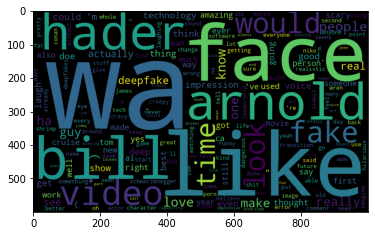

In [18]:
freq_content = FreqDist(filtered_content)
wc = WordCloud(width = 1000, height = 600)
plt.imshow(wc.generate_from_frequencies(freq_content))

In [19]:
import networkx as nx

In [20]:
node_words = []
for word in freq_content.most_common(10):
  node_words.append(word[0])

In [21]:
graph = nx.Graph()
graph.add_nodes_from(node_words)

In [22]:
import itertools

for sentence in comments:
  try:
    sentence = sentence.lower()
    tokenized_sentence = word_tokenize(sentence)
    sentence_node_words = []
    for word in tokenized_sentence:
      if word in node_words:
        sentence_node_words.append(word)
    sentence_node_words = list(set(sentence_node_words)) #Eliminating repeated words

    for pair in list(itertools.combinations(sentence_node_words, 2)):
      x, y = pair[0], pair[1]
      if pair in graph.edges:
        graph[x][y]['weight'] += 1
      else:
        graph.add_edge(x, y, weight = 1)
  except:
    pass

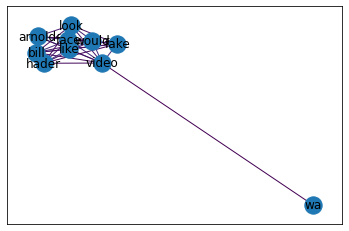

In [27]:
weights_att = nx.get_edge_attributes(graph, 'weight').items()
weights = []
for edge_weight in weights_att:
  weights.append(edge_weight[1])
nx.draw_networkx(graph, edge_color = weights, pos = nx.spring_layout(graph))